<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: 
Where datasets interact with our model
### Hidden Layer: 
Where functions are executed from inputs
### Output Layer: 
The result of a function having been performed on input data
### Neuron: 
Node, which fires if the appropriate signal is recieved
### Weight: 
How important a feature is
### Activation Function: 
Decides how much signal to pass to the node
### Node Map: 
Chart of neaural network paths from input to output
### Perceptron: 
A single node which takes any number of inputs and produces an output


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df.head()

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [3]:
X = df[['x1', 'x2']]
y = df['y']

In [4]:
def step_function(x):
    output = [0 if x[ii]> 1 else 1 for ii in range(len(x))]
    output = [[num] for num in output]
    return np.array(output)

In [55]:
np.random.seed(42)
weights = np.random.random((2,1))

correct_output = [[num] for num in y.tolist()]

for iteration in range(10):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(X, weights)

    # Activate!
    activated_output = step_function(weighted_sum)

    # Cac error
    correction =  correct_output - activated_output

    # Update the Weights
    weights += np.dot(X.T, correction)

print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[0.37454012]
 [0.95071431]]
Output after training
[[1]
 [1]
 [1]
 [0]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [7]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [8]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
import matplotlib.pyplot as plt

feats = list(diabetes)[:-1]

X_train = diabetes.drop(columns = ['Outcome'])
y_train = diabetes['Outcome']

X_train.shape, y_train.shape

((768, 8), (768,))

In [10]:
X_train = X_train.drop(columns = ['SkinThickness', 'Insulin']) ##Half or more of the data in Insulin and SkinThickness were zeroes, taking out for the moment.

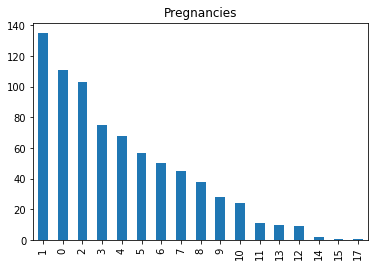

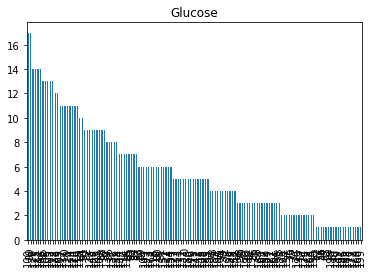

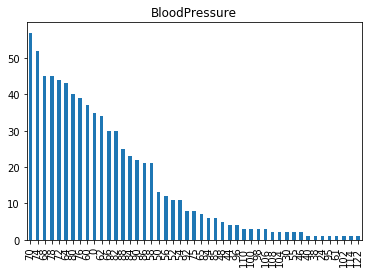

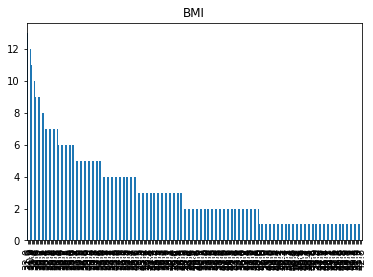

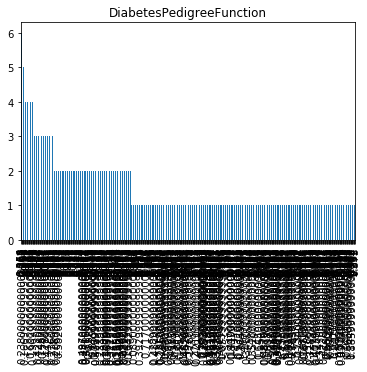

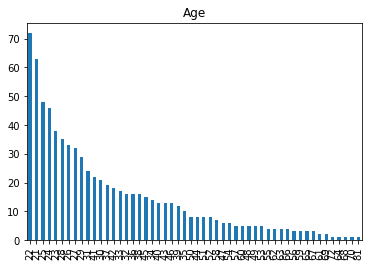

In [11]:
for column in list(X_train.columns):
    X_train[column].value_counts().plot(kind='bar')
    plt.title(f'{column}')
    plt.show()
    

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, stratify = y_train)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 6), (231, 6), (537,), (231,))

In [16]:
class Perceptron(object):
    
    def __init__(self, niter = 10):
        self.niter = niter
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def sigmoid_derivative(self, x):
        sx = self.sigmoid(x)
        return sx/(1-sx)

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Randomly Initialize Weights
        np.random.seed(42)
        self.weights = np.random.random((X.shape[1],1))
        
        #initialize error log
        self.errors = []

        for i in range(self.niter):
             # Weighted sum of inputs / weights
            self.weighted_sum = np.dot(X, self.weights)

            # Activate!
            self.activated_output = self.sigmoid(self.weighted_sum)
            
            self.correct_output = y.tolist()
            self.correct_output = [[num] for num in self.correct_output]
            # Cac error
            self.error =  self.correct_output - self.activated_output

            self.adjustment = self.error*self.sigmoid_derivative(self.weighted_sum)

            # Update the Weights
            self.weights += np.dot(X.T, self.adjustment)
            
        return self

    def predict(self, X):
        return self.activated_output

In [17]:
transformer = Normalizer()
X_norm = transformer.fit_transform(X_train)

trans_min_max = MinMaxScaler()
X_min_max = trans_min_max.fit_transform(X_train)

/home/j_m/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:
tron = Perceptron()
tron.fit(X_norm,y_train)

/home/j_m/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


In [19]:
pred = tron.predict(X_test)

In [20]:
test_values = [[num] for num in list(y_test)]
matches = [int(pred[ii]==test_values[ii]) for ii in range(len(test_values))]

In [21]:
total_correct = sum(matches)
avg_correct = total_correct/len(matches)
avg_correct

0.6320346320346321

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?